In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv',parse_dates=['date'])
data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20932.924968,2.155755,0.48988,NaN,0.00000,0.17908,1.11143
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809


In [5]:
data.isnull().sum()

date              0
iso_a3            0
currency_code     0
name              0
local_price       0
dollar_ex         0
dollar_price      0
GDP_bigmac        0
adj_price         0
USD               0
EUR              27
GBP               0
JPY               0
CNY               0
dtype: int64

In [6]:
data=data[(data['date'].dt.year==2019) & (data['date'].dt.month==1)]
data.head()


,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.399753,-0.43098,-0.50205,-0.39927,-0.29817,-0.37617
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58098.493185,4.422256,-0.04923,-0.16798,0.00375,0.17267,0.04235
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.536049,3.085813,0.42311,0.24536,0.50241,0.75525,0.56019
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,48323.923768,4.154216,-0.05279,-0.17109,0.00000,0.16829,0.03846
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.981740,0.23376,0.07967,0.30252,0.52171,0.35260


In [7]:
data.isnull().sum()

date             0
iso_a3           0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
GDP_bigmac       0
adj_price        0
USD              0
EUR              0
GBP              0
JPY              0
CNY              0
dtype: int64

<Figure size 1600x900 with 0 Axes>

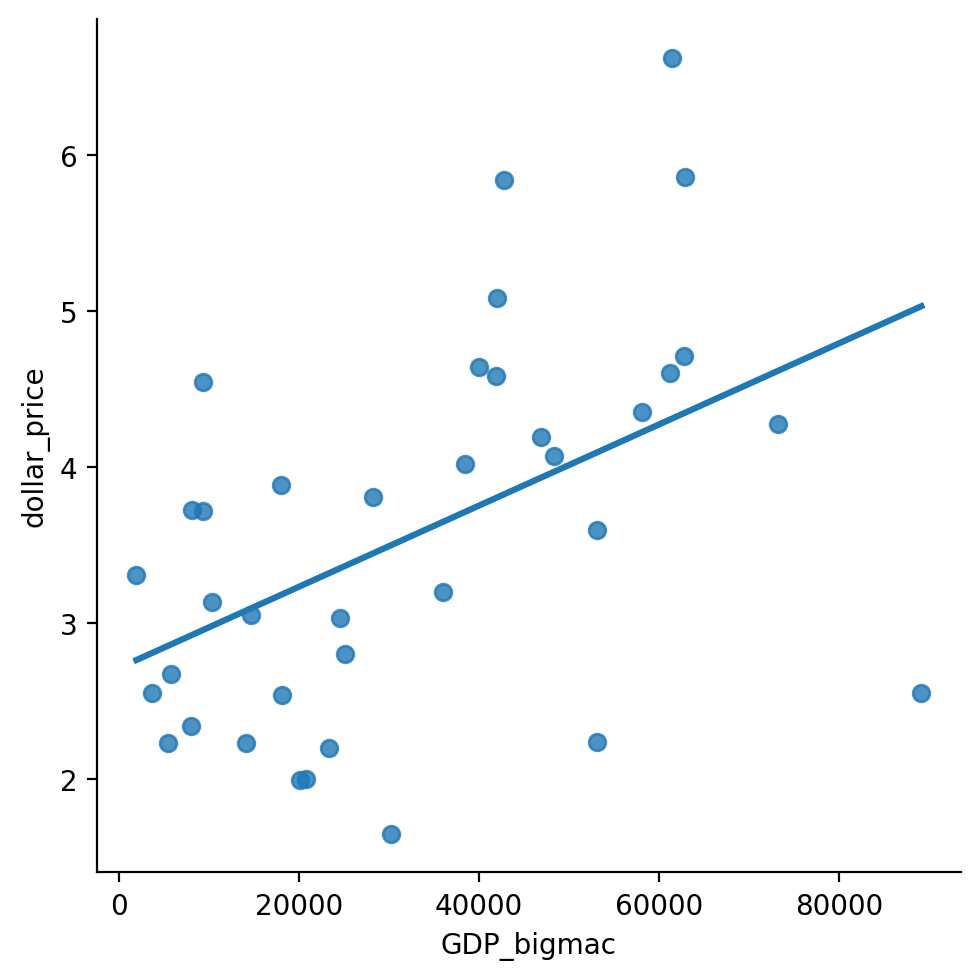

In [8]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='GDP_bigmac',y='dollar_price',data=data,ci=None)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
X=data[['GDP_bigmac']]
y=data.dollar_price

In [12]:
model.fit(X,y)

LinearRegression()

In [13]:
model.score(X,y)

0.23519741311775022

In [14]:
#สูตร y = a + bx

In [15]:
model.intercept_ + model.coef_ * 9000


array([2.94877492])

In [16]:
model.predict([[9000]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.94877492])

In [17]:
np.arange(5000,50001,2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [18]:
model.predict(np.arange(5000,50001,2500).reshape(-1,1))

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.90980887, 2.97475228, 3.03969569, 3.10463909,
       3.1695825 , 3.23452591, 3.29946931, 3.36441272, 3.42935612,
       3.49429953, 3.55924294, 3.62418634, 3.68912975, 3.75407315,
       3.81901656, 3.88395997, 3.94890337, 4.01384678])

In [19]:
np.linspace(5000,50000,20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [20]:
model.predict(np.linspace(5000,50000,20).reshape(-1,1))

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.9063908 , 2.96791613, 3.02944146, 3.0909668 ,
       3.15249213, 3.21401746, 3.27554279, 3.33706813, 3.39859346,
       3.46011879, 3.52164412, 3.58316945, 3.64469479, 3.70622012,
       3.76774545, 3.82927078, 3.89079611, 3.95232145, 4.01384678])

In [21]:
xx=model.predict(data[['GDP_bigmac']])

In [22]:
data['labels']=xx

In [23]:
data

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY,labels
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.399753,-0.43098,-0.50205,-0.39927,-0.29817,-0.37617,3.255593
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58098.493185,4.422256,-0.04923,-0.16798,0.00375,0.17267,0.04235,4.224224
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.536049,3.085813,0.42311,0.24536,0.50241,0.75525,0.56019,2.958193
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,48323.923768,4.154216,-0.05279,-0.17109,0.00000,0.16829,0.03846,3.970307
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.981740,0.23376,0.07967,0.30252,0.52171,0.35260,3.806917
1026,2019-01-01,CHL,CLP,Chile,2640.00,678.990000,3.888128,18014.007593,3.323054,0.13039,-0.01080,0.19338,0.39421,0.23927,3.182935
1027,2019-01-01,CHN,CNY,China,20.90,6.849700,3.051229,14684.528808,3.231753,-0.08786,-0.20179,-0.03703,0.12503,0.00000,3.096444
1028,2019-01-01,COL,COP,Colombia,11900.00,3191.500000,3.728654,8101.496446,3.051232,0.18059,0.03314,0.24639,0.45614,0.29432,2.925434
1029,2019-01-01,CZE,CZK,Czech Republic,85.00,22.311650,3.809669,28252.359106,3.603812,0.02129,-0.10627,0.07820,0.25965,0.11967,3.448900
1030,2019-01-01,DNK,DKK,Denmark,30.00,6.515450,4.604440,61193.362480,4.507124,-0.01304,-0.13631,0.04196,0.21732,0.08203,4.304621


In [24]:
data['date']=data.date

In [25]:
data

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY,labels
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.399753,-0.43098,-0.50205,-0.39927,-0.29817,-0.37617,3.255593
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58098.493185,4.422256,-0.04923,-0.16798,0.00375,0.17267,0.04235,4.224224
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.536049,3.085813,0.42311,0.24536,0.50241,0.75525,0.56019,2.958193
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,48323.923768,4.154216,-0.05279,-0.17109,0.00000,0.16829,0.03846,3.970307
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.981740,0.23376,0.07967,0.30252,0.52171,0.35260,3.806917
1026,2019-01-01,CHL,CLP,Chile,2640.00,678.990000,3.888128,18014.007593,3.323054,0.13039,-0.01080,0.19338,0.39421,0.23927,3.182935
1027,2019-01-01,CHN,CNY,China,20.90,6.849700,3.051229,14684.528808,3.231753,-0.08786,-0.20179,-0.03703,0.12503,0.00000,3.096444
1028,2019-01-01,COL,COP,Colombia,11900.00,3191.500000,3.728654,8101.496446,3.051232,0.18059,0.03314,0.24639,0.45614,0.29432,2.925434
1029,2019-01-01,CZE,CZK,Czech Republic,85.00,22.311650,3.809669,28252.359106,3.603812,0.02129,-0.10627,0.07820,0.25965,0.11967,3.448900
1030,2019-01-01,DNK,DKK,Denmark,30.00,6.515450,4.604440,61193.362480,4.507124,-0.01304,-0.13631,0.04196,0.21732,0.08203,4.304621


In [26]:
data.to_csv (r'C:\Users\User\OneDrive\Desktop\export_predictprice1.csv', index = False)